# Naive Bayes

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from naive_bayes import MultinomialNaiveBayes, PoissonNaiveBayes
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [3]:
def split(X, y, ratio=0.2):
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y, test_size=ratio, random_state=105)
    return train_data, test_data, train_labels, test_labels

In [4]:
def train(classifier, X, y, use_tfidf=True):
    cvec = CountVectorizer(analyzer="word", 
                           stop_words="english",
                            max_features=10000)

    if use_tfidf:
        classification = Pipeline([("vectorizer", cvec),
                                   ("transformer", TfidfTransformer()),
                                   ("classifier", classifier)])
    else:
        classification = Pipeline([("vectorizer", cvec),
                                   ("classifier", classifier)])        

    classification = classification.fit(X, y)
    return classification

In [5]:
def score(pred, y):
    print("accuracy: {}".format(np.mean(pred == y)))
    print(metrics.classification_report(y, pred))
    confusion_matrix = metrics.confusion_matrix(y, pred)
    return confusion_matrix

In [6]:
def plot(matrix, title):
    categories = ["hockey", "movies", "nba", "news", "nfl", "politics",
                  "soccer", "worldnews"]
    df = pd.DataFrame(matrix, index=categories, columns=categories)
    plt.figure(figsize=(10, 7))
    sns.heatmap(df, annot=True, fmt="g")
    plt.savefig(title)
    plt.show()

## Split Data

In [7]:
X = pd.read_csv("../data/train_input.csv")["conversation"]
y = pd.read_csv("../data/train_output.csv")["category"]
X_test = pd.read_csv("../data/test_input.csv")["conversation"]

In [8]:
train_X, test_X, train_y, test_y = split(X, y)

## Results With TF-IDF

### Multinomial Naive Bayes

In [9]:
mnb = MultinomialNaiveBayes()
mnb = train(mnb, train_X, train_y, use_tfidf=True)

In [10]:
mnb_prediction = mnb.predict(test_X)

accuracy: 0.895454545455
             precision    recall  f1-score   support

     hockey       0.94      0.95      0.94      4170
     movies       0.94      0.97      0.96      4510
        nba       0.97      0.93      0.95      3696
       news       0.75      0.73      0.74      4256
        nfl       0.96      0.95      0.95      3978
   politics       0.81      0.82      0.82      3943
     soccer       0.96      0.96      0.96      4299
  worldnews       0.84      0.85      0.84      4148

avg / total       0.90      0.90      0.90     33000



/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


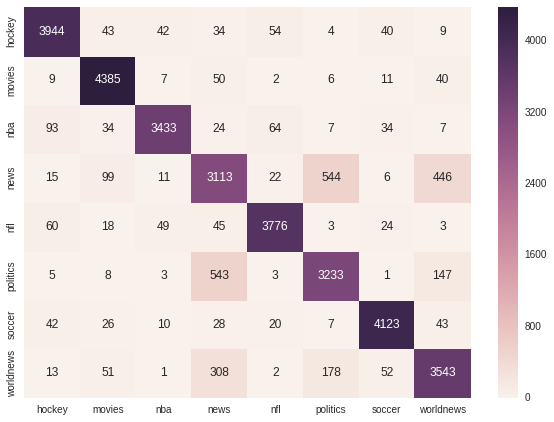

In [11]:
mnb_confusion_matrix = score(mnb_prediction, test_y)
plot(mnb_confusion_matrix, "MultinomialNaiveBayesTFIDF")

### Poisson Naive Bayes

In [12]:
pnb = PoissonNaiveBayes()
pnb = train(pnb, train_X, train_y, use_tfidf=True)

In [13]:
pnb_prediction = pnb.predict(test_X)

accuracy: 0.801393939394
             precision    recall  f1-score   support

     hockey       0.85      0.82      0.83      4170
     movies       0.92      0.87      0.89      4510
        nba       0.89      0.80      0.84      3696
       news       0.53      0.73      0.61      4256
        nfl       0.87      0.86      0.87      3978
   politics       0.77      0.73      0.75      3943
     soccer       0.91      0.87      0.89      4299
  worldnews       0.80      0.73      0.76      4148

avg / total       0.82      0.80      0.81     33000



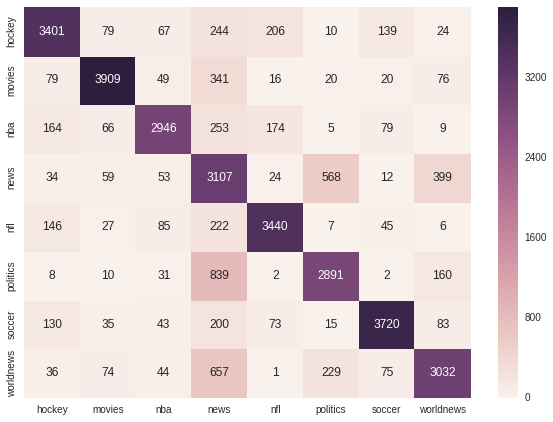

In [14]:
pnb_confusion_matrix = score(pnb_prediction, test_y)
plot(pnb_confusion_matrix, "PoissonNaiveBayesTFIDF")

## Results Without TF-IDF

### Multinomial Naive Bayes

In [15]:
mnb = MultinomialNaiveBayes()
mnb = train(mnb, train_X, train_y, use_tfidf=False)

In [16]:
mnb_prediction = mnb.predict(test_X)

accuracy: 0.896212121212
             precision    recall  f1-score   support

     hockey       0.94      0.95      0.95      4170
     movies       0.94      0.97      0.96      4510
        nba       0.96      0.94      0.95      3696
       news       0.75      0.73      0.74      4256
        nfl       0.96      0.95      0.95      3978
   politics       0.81      0.82      0.82      3943
     soccer       0.96      0.96      0.96      4299
  worldnews       0.84      0.86      0.85      4148

avg / total       0.90      0.90      0.90     33000



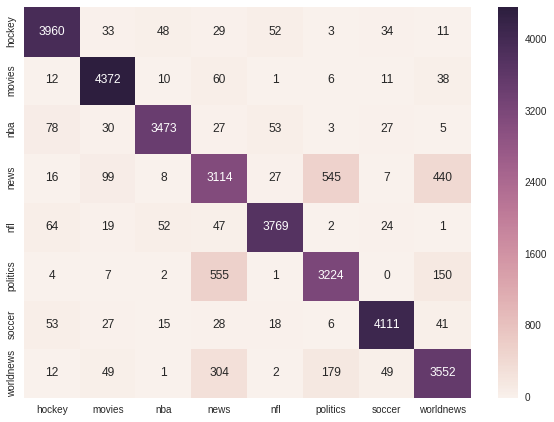

In [17]:
mnb_confusion_matrix = score(mnb_prediction, test_y)
plot(mnb_confusion_matrix, "MultinomialNaiveBayesNoTFIDF")

### Poisson Naive Bayes

In [18]:
pnb = PoissonNaiveBayes()
pnb = train(pnb, train_X, train_y, use_tfidf=False)

In [19]:
pnb_prediction = pnb.predict(test_X)

naive_bayes.py:119: RuntimeWarning: overflow encountered in exp
  p_c = np.exp(z + self.class_log_prior_)
naive_bayes.py:121: RuntimeWarning: invalid value encountered in divide
  p = p_c / (p_c + p_c_not)


accuracy: 0.62396969697
             precision    recall  f1-score   support

     hockey       0.70      0.50      0.58      4170
     movies       0.75      0.78      0.77      4510
        nba       0.46      0.53      0.49      3696
       news       0.38      0.63      0.48      4256
        nfl       0.74      0.61      0.67      3978
   politics       0.69      0.68      0.68      3943
     soccer       0.82      0.61      0.70      4299
  worldnews       0.70      0.63      0.67      4148

avg / total       0.66      0.62      0.63     33000



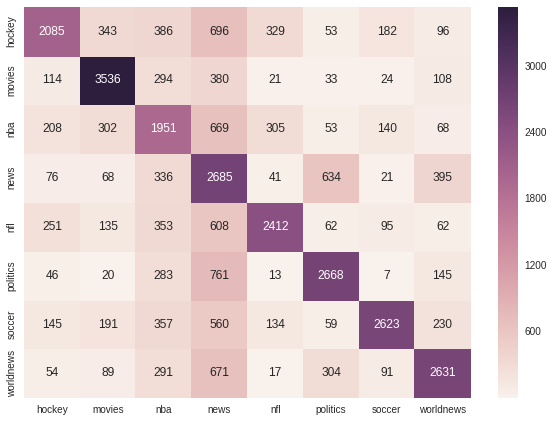

In [20]:
pnb_confusion_matrix = score(pnb_prediction, test_y)
plot(pnb_confusion_matrix, "PoissonNaiveBayesNoTFIDF")